In [17]:
import scipy
import scipy.io
from scipy.io import savemat
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import math

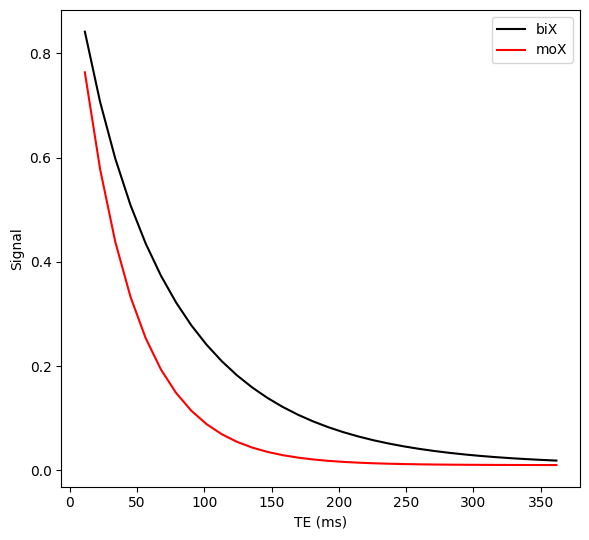

In [18]:
v_range = 25
h_range = 25
n_elements_brain = 32
t_increment_brain = 11.3
TDATA = np.linspace(t_increment_brain, (n_elements_brain)*(t_increment_brain), n_elements_brain)

initial_shape = np.ones((v_range,h_range,n_elements_brain))

biX_data = initial_shape*(0.2*np.exp(-TDATA/30)+0.8*np.exp(-TDATA/80)+0.01)

moX_data = initial_shape*(np.exp(-TDATA/40)+0.01)

test_name = "big_BIC_triTest"

fig, ax = plt.subplots(1,1,figsize=(6,5.5),tight_layout=True)
plt.plot(TDATA, biX_data[0,0,:], color = 'k', label = 'biX')
plt.plot(TDATA, moX_data[0,0,:], color = 'r', label = 'moX')
plt.xlabel('TE (ms)')
plt.ylabel('Signal')
plt.legend()


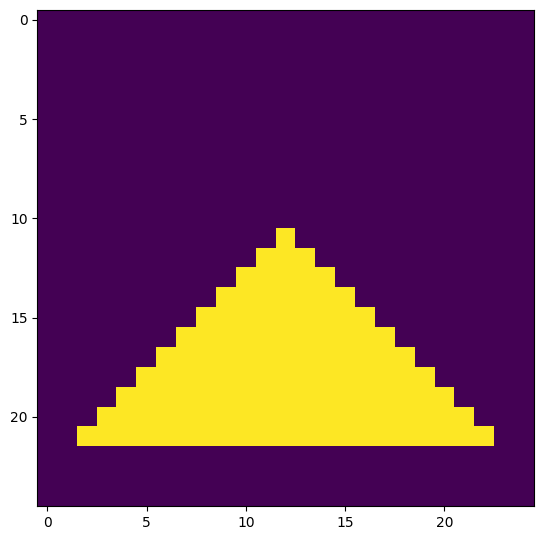

In [19]:
bool_array = np.zeros((v_range, h_range))

for i in range(v_range):
    for j in range(h_range):
        if (i+2 > j) and (v_range-i-3 < j) and (i<v_range - 3):
            bool_array[i,j] = 1

fig, ax = plt.subplots(1,1,figsize=(15,5.5),tight_layout=True)
plt.imshow(bool_array)

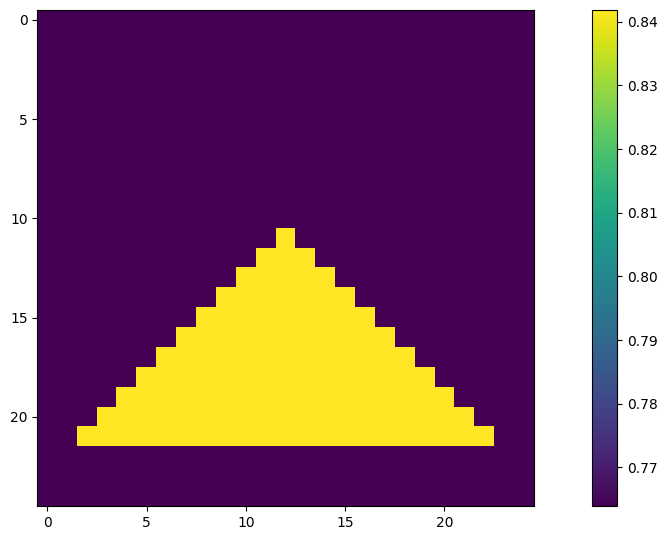

In [20]:
bool_array_3D = bool_array[:,:,np.newaxis]

BIC_triTest = biX_data*bool_array_3D + moX_data*((bool_array_3D+1)%2)

fig, ax = plt.subplots(1,1,figsize=(15,5.5),tight_layout=True)
triangle = plt.imshow(BIC_triTest[:,:,0])
fig.colorbar(triangle, ax=ax, fraction=0.046, pad=0.04)

In [21]:
savemat(f"MB_References\BIC_tests\{test_name}.mat", {test_name: BIC_triTest})